In [1]:
import illoominate
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train_df = pd.read_csv('data/rsc15_100k/processed/train.csv', sep='\t')
validation_df = pd.read_csv('data/rsc15_100k/processed/valid.csv', sep='\t')
# rsc15 items considered sustainable. (Randomly chosen for this dataset) 
sustainable_df = pd.read_csv('data/rsc15_100k/processed/sustainable.csv', sep='\t')

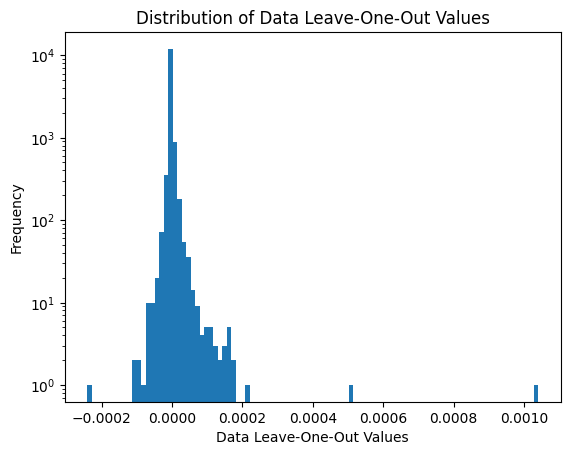

In [3]:
importance = illoominate.data_loo_values(
    train_df=train_df,
    validation_df=validation_df,
    model='vmis',
    metric='responsiblemrr@20',
    params={'m':500, 'k':100, 'seed': 42},
    sustainable_df=sustainable_df,
)

plt.hist(importance['score'], density=False, bins=100)
plt.title('Distribution of Data Leave-One-Out Values')
plt.yscale('log')
plt.ylabel('Frequency')
plt.xlabel('Data Leave-One-Out Values')
plt.savefig('data/rsc15_100k/processed/loo_responsiblemrr.png', dpi=300)
plt.show()


In [4]:
threshold = importance['score'].quantile(0.05)  # 5th percentile threshold
filtered_importance_values = importance[importance['score'] >= threshold]
train_df_pruned = train_df.merge(filtered_importance_values, on='session_id')
print(train_df_pruned)

       session_id    item_id     timestamp         score
0               3  214716935  1.396437e+09  0.000000e+00
1               3  214832672  1.396438e+09  0.000000e+00
2               7  214826835  1.396414e+09  4.817342e-06
3               7  214826715  1.396414e+09  4.817342e-06
4              11  214821275  1.396515e+09  3.693296e-05
...           ...        ...           ...           ...
48231       31808  214820441  1.396508e+09  8.028904e-07
48232       31812  214662819  1.396365e+09 -8.028904e-07
48233       31812  214836765  1.396365e+09 -8.028904e-07
48234       31812  214836073  1.396365e+09 -8.028904e-07
48235       31812  214662819  1.396365e+09 -8.028904e-07

[48236 rows x 4 columns]
